In [1]:
import glob
import pandas as pd
import numpy as np
from wordcloud import WordCloud

import nltk
nltk.download('averaged_perceptron_tagger')

import spacy
nlp = spacy.load("en_core_web_sm")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\veselin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# load data
data = pd.read_csv('Data/elon_mulk_tweets.csv')
data.head()

,date,tweet,language,tweet_length,number_of_tokens,sentence_count
0,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon...",en,92,17,1
1,2011-12-28 22:27:08,So true :),en,20,4,1
2,2011-12-27 23:38:55,If you ever wanted to know the *real* truth ab...,en,118,18,1
3,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt ...,en,97,13,1
4,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the ki...",en,117,19,3


## Apply PoS taggining

### Compare NLTK and Spacy

In [3]:
# example sentences

sentence_1 = 'Please book my flight to California'
sentence_2 = 'I read a very good book'

### NLTK PoS tagging

In [6]:
# PoS tags for sentence 1
tokenized_sent = nltk.sent_tokenize(sentence_1)
pd.DataFrame([nltk.pos_tag(nltk.word_tokenize(word)) for word in tokenized_sent][0])

,0,1
0,Please,NNP
1,book,NN
2,my,PRP$
3,flight,NN
4,to,TO
5,California,NNP


In [7]:
# PoS tags for sentence 2
tokenized_sent = nltk.sent_tokenize(sentence_2)
[nltk.pos_tag(nltk.word_tokenize(word)) for word in tokenized_sent]

[[('I', 'PRP'),
  ('read', 'VBP'),
  ('a', 'DT'),
  ('very', 'RB'),
  ('good', 'JJ'),
  ('book', 'NN')]]

We can see that book was tagged incorrectly as a "noun" and "please" was tagged as NNp and noy as a verb

### Spacy PoS tagging

In [8]:
# PoS tags for sentence 1
doc = nlp(sentence_1)
tags = []
for token in doc:
    tags.append([token.text, token.pos_])
pd.DataFrame(tags)

,0,1
0,Please,INTJ
1,book,VERB
2,my,PRON
3,flight,NOUN
4,to,ADP
5,California,PROPN


In [16]:
# PoS tags for sentence 1
doc = nlp(sentence_2)
for token in doc:
    print(token.text, token.pos_)

I PRON
read VERB
a DET
very ADV
good ADJ
book NOUN


We can see that "book" and "please" were tagged correctly with spacy because the context was considered. 

### Elon Musk Tweets PoS taggining using Spacy

In [9]:
# fucntion that returns a dataframe with all the words and their corresponding PoS taggs
def pos_tag(text):
    df = pd.DataFrame(columns = ['WORD', 'POS'])
    doc = nlp(text)
    for token in doc:
        df = df.append({'WORD': token.text, 'POS': token.pos_}, ignore_index=True)
    return df

In [10]:
# apply pos_tag function to all tweets
df_pos = pd.DataFrame(columns = ['WORD', 'POS'])
df_pos = pos_tag(data['tweet'].to_string())
df_pos.shape

KeyboardInterrupt: 

In [ ]:
# save pos tag dataframe
df_pos.to_csv('Data/elon_musk_tweets_pos_tags.csv', index=False)

## Vizualizations (noun, verb, pronoun, adjective)

In [11]:
# load pos tag data
df_pos = pd.read_csv('Data/elon_musk_tweets_pos_tags.csv')

Text(0.5, 1.0, 'Number of value per PoS tag')

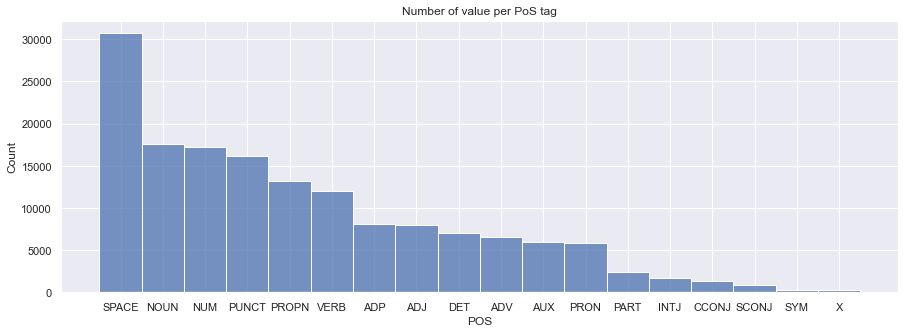

In [12]:
# PoS tag counts
df_top_pos = df_pos.groupby('POS')['POS'].count().\
    reset_index(name='count').sort_values(['count'],ascending=False)

df_pos['POS'] = pd.Categorical(df_pos['POS'], df_top_pos['POS'].values)

plt.figure(figsize = (15,5))
sns.histplot(x='POS', data=df_pos,)
plt.title('Number of value per PoS tag')

### Explore most used verbs

In [13]:
# Most used verbs by Elon
df_verb = df_pos[df_pos['POS'] == 'VERB'].copy()
df_verb.groupby('WORD')['WORD'].count().reset_index(name='count').\
    sort_values(['count'], ascending=False).head(10)

,WORD,count
609,be,637
1308,have,279
1438,is,250
998,do,217
2628,’s,216
1571,make,124
1302,has,111
2627,’re,111
1653,need,111
790,coming,110


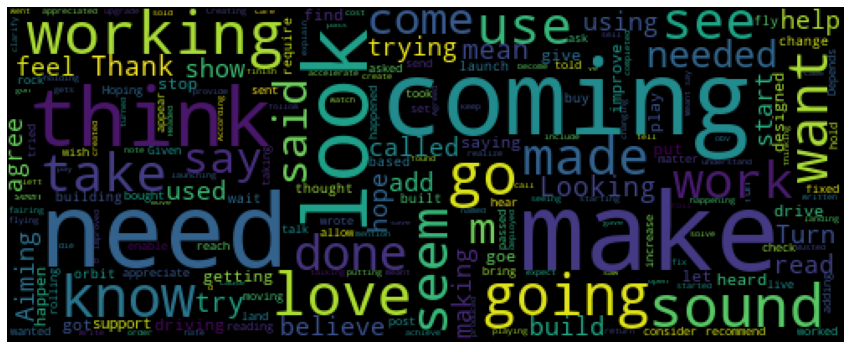

In [30]:
# wordcloud verbs
list_verb = df_pos.loc[df_pos['POS'] == 'VERB']['WORD'].tolist()
list_verb = [x for x in list_verb if x not in ['\'s', '\'re', '\'m', 'm', 're', 's', '’re', '’s']]
unique_string=(" ").join(list_verb)
wordcloud = WordCloud(width = 500, height = 200).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

### Explore most used adjectives

In [31]:
# Most used verbs by Elon
df_adj = df_pos[df_pos['POS'] == 'ADJ'].copy()
df_adj.groupby('WORD')['WORD'].count().reset_index(name='count').\
    sort_values(['count'], ascending=False).head(10)

,WORD,count
800,great,205
793,good,181
132,Good,146
1492,true,140
1084,next,119
831,high,118
1054,more,114
331,True,113
1006,many,110
1422,sure,99


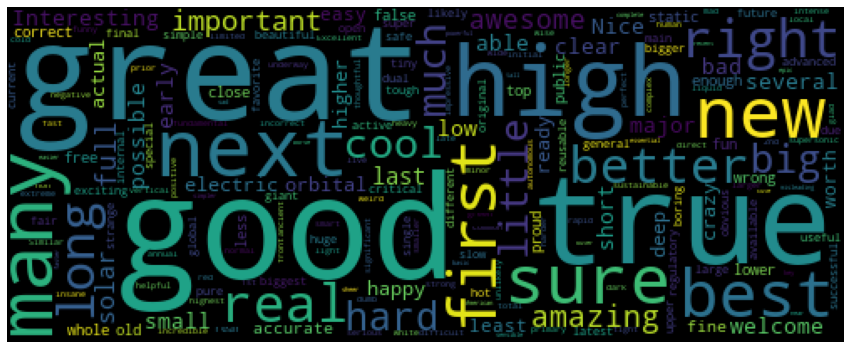

In [32]:
# wordcloud adjectives
list_adj = df_pos.loc[df_pos['POS'] == 'ADJ']['WORD'].tolist()
unique_string=(" ").join(list_adj)
wordcloud = WordCloud(width = 500, height = 200).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

### Explore most used nouns

In [70]:
# Most used nouns by Elon
df_noun = df_pos[df_pos['POS'] == 'NOUN'].copy()
df_noun.groupby('WORD')['WORD'].count().reset_index(name='count').\
    sort_values(['count'], ascending=False).head(10)

,WORD,count
4599,time,137
532,Thanks,135
3930,rocket,133
1146,car,132
3397,people,119
1,%,119
4504,team,116
3499,point,111
2878,lot,106
5012,year,104


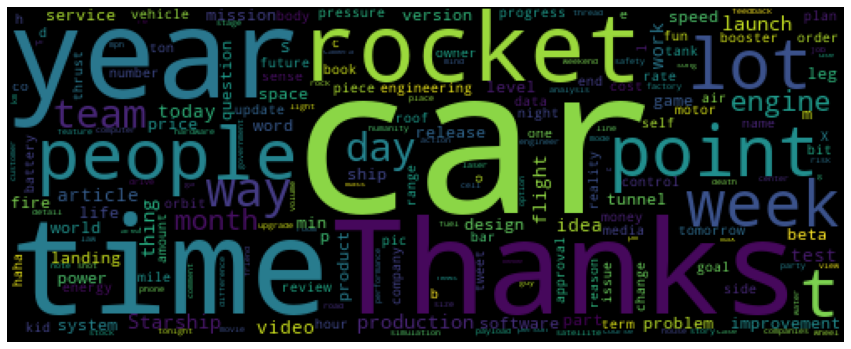

In [35]:
# wordcloud nouns
list_noun = df_pos.loc[df_pos['POS'] == 'NOUN']['WORD'].tolist()
unique_string=(" ").join(list_noun)
wordcloud = WordCloud(width = 500, height = 200).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

### Explore most used pronouns

In [39]:
# Most used pronouns by Elon
df_pron = df_pos[df_pos['POS'] == 'PRON'].copy()
df_pron.groupby('WORD')['WORD'].count().reset_index(name='count').\
    sort_values(['count'], ascending=False).head(10)

,WORD,count
10,I,1055
51,it,620
88,you,480
27,We,433
11,It,416
81,we,402
56,my,215
32,You,161
54,me,145
61,our,145


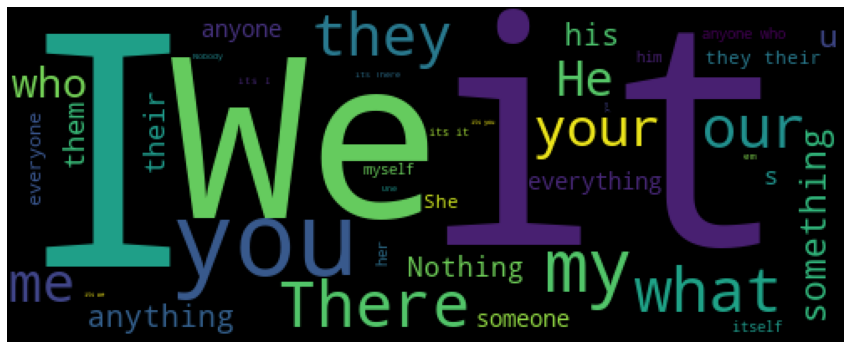

In [40]:
# wordcloud pronouns
list_pron = df_pos.loc[df_pos['POS'] == 'PRON']['WORD'].tolist()
unique_string=(" ").join(list_pron)
wordcloud = WordCloud(width = 500, height = 200, stopwords = []).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()